Importing the model


In [1]:
from cobra.io import read_sbml_model, write_sbml_model
model = read_sbml_model('/Users/nikow/github-classroom/27410/group-assingment-team-4/yeast-GEM-8.7.0/model/yeast-GEM2.xml') # loading
from cobra import Reaction, Metabolite, Gene
import pandas as pd

### Identification of upregulation and downregulation gene targets
In order to optimize the production of beta-farnesene in yeast, computational tools can be utilized to identify gene targets. Those tools can be algorithms to discover gene deletions that increase overall productivity, or other analysis methods that aim to discover up- or down-regulation gene targets. The advantage of the later method is that gene deletions tend to negatively affect the growth rate, in contrast with modifications in the expression level of target genes.
Here, we used the flux variability scanning method based on enforced objective flux (FVSEOF), which identifies gene amplification targets (J.M. Park et al 2012). The CAMEO tool for running this analysis is used, based on an objective flux.

In [4]:

from cameo.strain_design.deterministic.flux_variability_based import FSEOF
fseof = FSEOF(model)
result = fseof.run(target = model.reactions.R08695)
df = result.data_frame

For the next step, we are going to plot all the gene targets that display changed levels of flux, when our objective target is the beta-farnesene synthesis reaction.

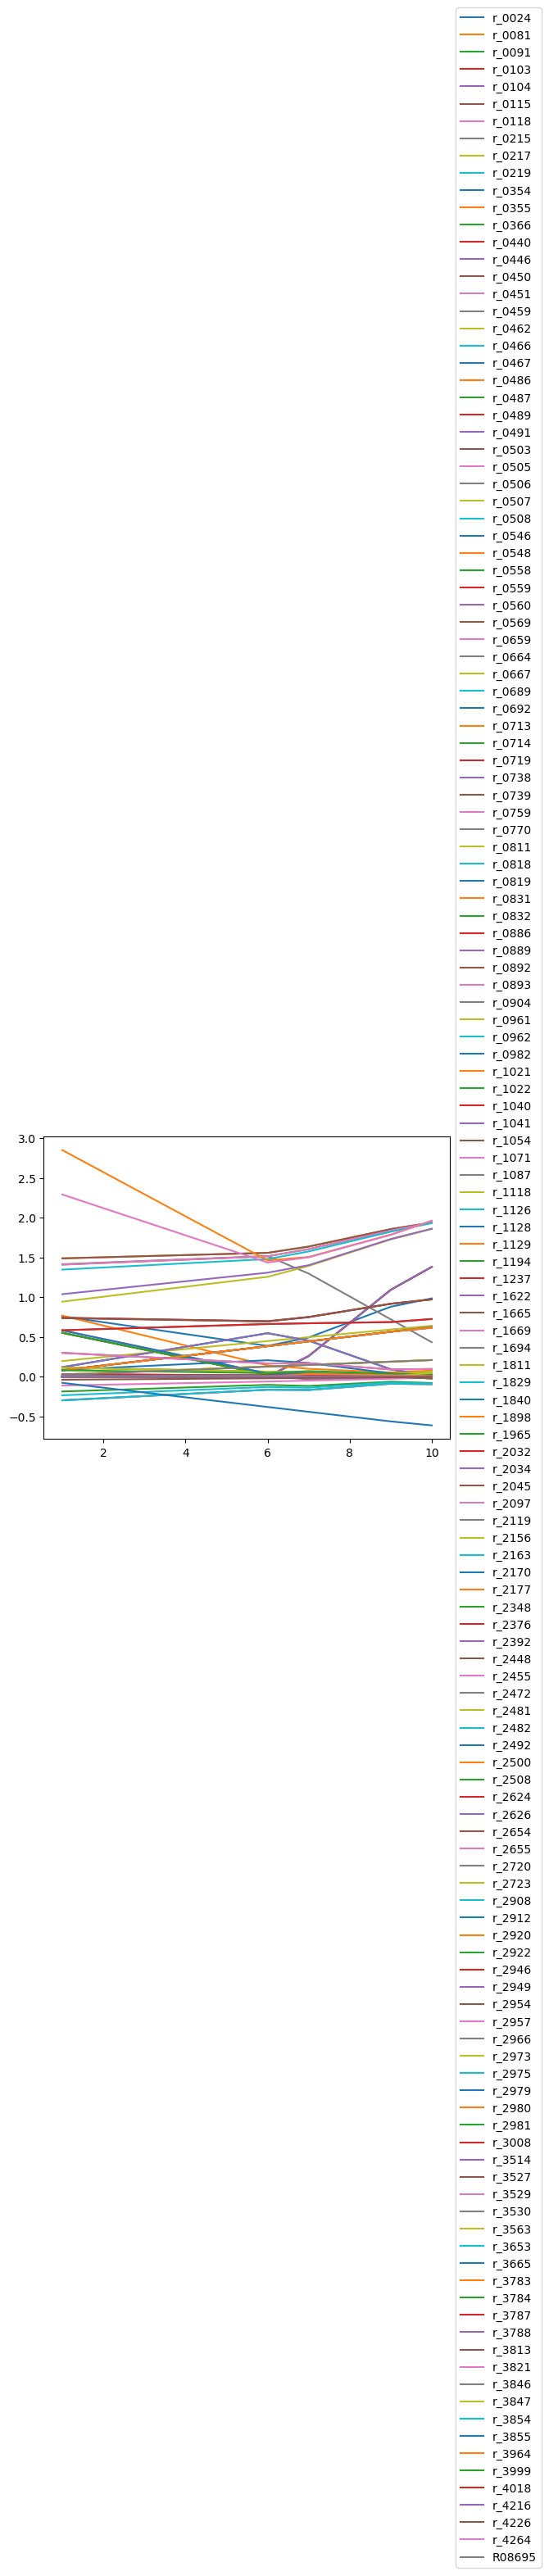

In [5]:
from matplotlib import pyplot as plt
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Fluxes of zero were removed, and values were sorted.

In [6]:

df= df.sort_values([1], ascending = False)
from pytest import approx 
removed_zero = (df != approx(0.0)).all(axis=1)
df = df.loc[removed_zero]
df.head()

,1,2,3,4,5,6,7,8,9,10
r_1021,2.848394,2.570965,2.293535,2.016105,1.738675,1.461246,1.503830,1.644335,1.784840,1.959941
r_4264,2.289830,2.118852,1.947874,1.776895,1.605917,1.434939,1.500182,1.641537,1.782892,1.958882
r_0892,1.486771,1.500628,1.514486,1.528344,1.542202,1.556060,1.634907,1.744867,1.854827,1.937830
r_0486,1.486771,1.500628,1.514486,1.528344,1.542202,1.556060,1.634907,1.744867,1.854827,1.937830
r_0770,1.413461,1.433870,1.454280,1.474689,1.495098,1.515507,1.295578,1.008024,0.720471,0.431700


Alternative way to plot the the genes:

In [14]:
import numpy as np


Tne relative changes for each gene flux can be calculated, and we filter the ones under 80% out.

In [31]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1
target_reactions_df = df[df['relative_change_in_flux'] > 1.8]

In [32]:
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
r_0451,0.550497,0.444766,0.339036,0.233305,0.127575,0.021844,-0.000000,-0.000000,-0.000000,-0.000000,inf
r_0491,0.005225,0.004758,0.004291,0.003824,0.003357,0.002890,0.259598,0.675691,1.091785,1.379810,1.996213
r_0024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003360,2.000000
r_1898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033410,0.025624,0.017839,0.006334,2.000000
r_0489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257236,0.673880,1.090523,1.379124,2.000000
r_1040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046847,2.000000
r_0692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007528,0.005774,0.004019,0.002184,2.000000
r_0689,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013930,2.000000
r_0664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.033410,-0.025624,-0.017839,-0.006334,2.000000
r_0559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010063,2.000000


Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

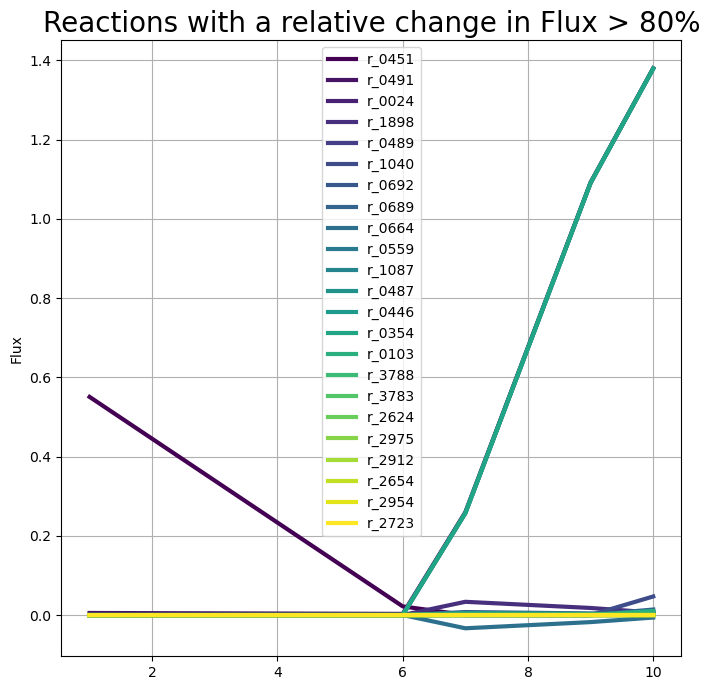

In [34]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)

Lowest flux genes:

In [35]:
target_reactions_df.tail()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
r_2975,-0.000065,-0.00006,-0.000054,-0.000048,-0.000042,-0.000036,-0.0,0.0,0.0,0.0,inf
r_2912,-0.000065,-0.00006,-0.000054,-0.000048,-0.000042,-0.000036,-0.0,0.0,0.0,0.0,inf
r_2654,-0.000065,-0.00006,-0.000054,-0.000048,-0.000042,-0.000036,-0.0,0.0,0.0,0.0,inf
r_2954,-0.000065,-0.00006,-0.000054,-0.000048,-0.000042,-0.000036,-0.0,0.0,0.0,0.0,inf
r_2723,-0.000065,-0.00006,-0.000054,-0.000048,-0.000042,-0.000036,-0.0,0.0,0.0,0.0,inf


Highest flux genes:

In [36]:
target_reactions_df.head()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
r_0451,0.550497,0.444766,0.339036,0.233305,0.127575,0.021844,-0.000000,-0.000000,-0.000000,-0.000000,inf
r_0491,0.005225,0.004758,0.004291,0.003824,0.003357,0.002890,0.259598,0.675691,1.091785,1.379810,1.996213
r_0024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003360,2.000000
r_1898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033410,0.025624,0.017839,0.006334,2.000000
r_0489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257236,0.673880,1.090523,1.379124,2.000000
